In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
for dirname, _, filenames in os.walk('//Users/cemozb/Desktop/portfolio/FIFA - World Cup Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
wc_1930 = pd.read_csv('/Users/cemozb/Desktop//FIFA_WC_Data_Analysis/FIFA - World Cup Data/FIFA - 1930.csv', index_col="Position")
wc_1930.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Uruguay,4,4,0,0,15,3,12,8
2,Argentina,5,4,0,1,18,9,9,8
3,United States,3,2,0,1,7,6,1,4
4,Yugoslavia,3,2,0,1,7,7,0,4
5,Chile,3,2,0,1,5,3,2,4


In [4]:
wc_summary = pd.read_csv("/Users/cemozb/Desktop/FIFA_WC_Data_Analysis//FIFA - World Cup Summary.csv", index_col="YEAR")
wc_summary.head()

,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
YEAR,,,,,,,,
1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
1938,France,Italy,Hungary,Brazil,15,18,84,4.7
1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [5]:
DATASET_PATH = '/Users/cemozb/Desktop/FIFA_WC_Data_Analysis/FIFA - World Cup Data'

# List all CSV files
file_names = [f for f in os.listdir(DATASET_PATH) if f.endswith(".csv")]

# Load and combine all CSV files
df_list = [pd.read_csv(os.path.join(DATASET_PATH, file)) for file in file_names]
df = pd.concat(df_list, ignore_index=True)  # Merge all DataFrames

In [6]:
df.head()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Uruguay,4,3,1,0,15,5,10,7
1,2,Brazil,6,4,1,1,22,6,16,9
2,3,Sweden,5,2,1,2,11,15,−4,5
3,4,Spain,6,3,1,2,10,12,−2,7
4,5,Yugoslavia,3,2,0,1,7,3,4,4


In [7]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         489 non-null    int64 
 1   Team             489 non-null    object
 2   Games Played     489 non-null    int64 
 3   Win              489 non-null    int64 
 4   Draw             489 non-null    int64 
 5   Loss             489 non-null    int64 
 6   Goals For        489 non-null    int64 
 7   Goals Against    489 non-null    int64 
 8   Goal Difference  489 non-null    object
 9   Points           489 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 38.3+ KB
None


In [8]:
df.isnull().sum()

Position           0
Team               0
Games Played       0
Win                0
Draw               0
Loss               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
dtype: int64

In [9]:
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib.colors import Normalize

def map_colors(values, cmap_name="Blues"):
    """
    Normalize values and return a list of RGBA colors using the given colormap.
    """
    norm = Normalize(vmin=min(values), vmax=max(values))
    cmap = get_cmap(cmap_name)
    return [cmap(norm(val)) for val in values], cmap, norm

/var/folders/7k/v7p94gsd69j49_qpn3c1vz080000gn/T/ipykernel_18480/1609543230.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap_name)
/var/folders/7k/v7p94gsd69j49_qpn3c1vz080000gn/T/ipykernel_18480/1209755425.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Total Goals (Color Scale)")


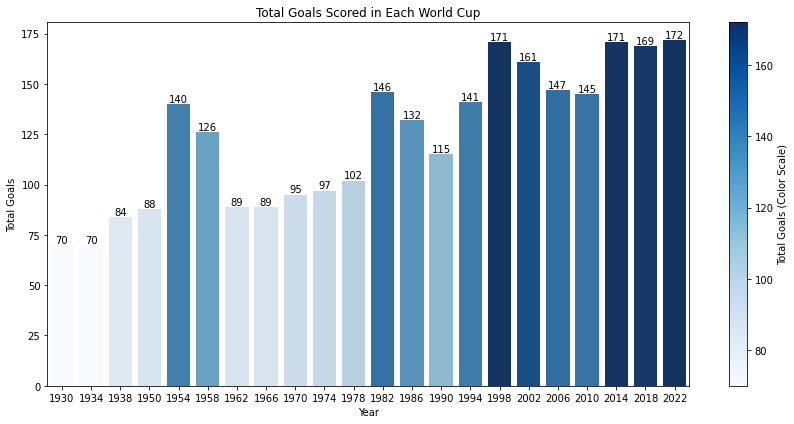

In [10]:
# Grouped data
goals_per_wc = wc_summary.groupby("YEAR")["GOALS SCORED"].sum()

# Get color mapping
colors, cmap, norm = map_colors(goals_per_wc.values, cmap_name="Blues")

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=goals_per_wc.index, y=goals_per_wc.values, palette=colors)

# Add colorbar legend
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Total Goals (Color Scale)")

# Titles and labels
plt.title("Total Goals Scored in Each World Cup")
plt.xlabel("Year")
plt.ylabel("Total Goals")

# Add value labels on bars
for bar, value in zip(bars.patches, goals_per_wc.values):
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(value)}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


/var/folders/7k/v7p94gsd69j49_qpn3c1vz080000gn/T/ipykernel_18480/1609543230.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap_name)


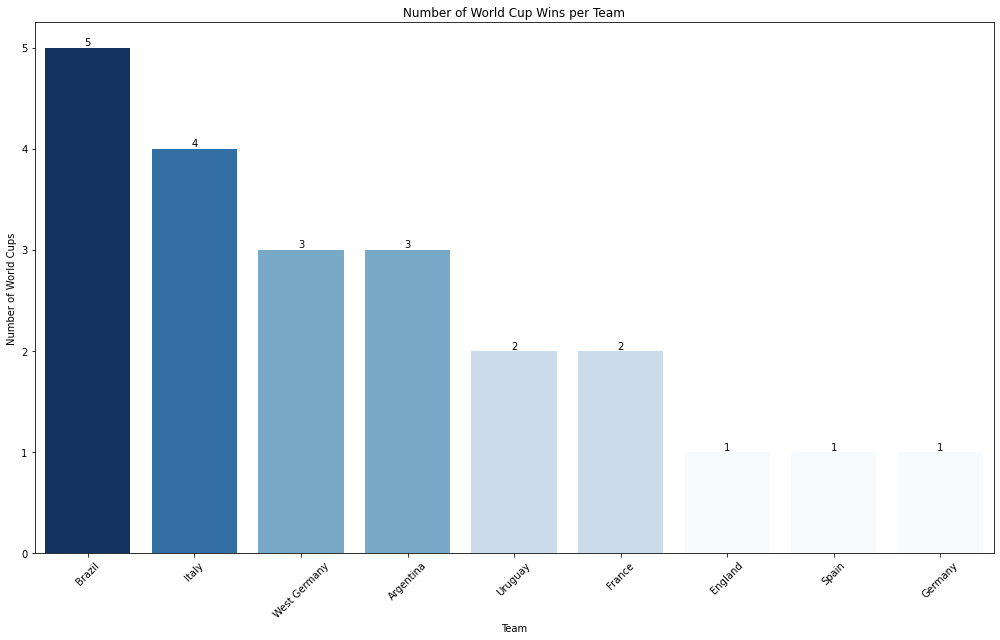

In [11]:
# Count World Cup wins
team_counts = wc_summary["CHAMPION"].value_counts()
teams = team_counts.index
counts = team_counts.values

# Color mapping: darker = more wins
colors, cmap, norm = map_colors(counts, cmap_name="Blues")

# Plot
plt.figure(figsize=(14, 9))
ax = sns.barplot(x=teams, y=counts, palette=colors)

plt.title("Number of World Cup Wins per Team")
plt.xlabel("Team")
plt.ylabel("Number of World Cups")
plt.xticks(rotation=45)

# Add labels
for bar, count in zip(ax.patches, counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(count)}",
        ha="center", va="bottom"
    )

plt.tight_layout()
plt.show()


In [12]:
# Combine all teams from all DataFrames
all_teams = pd.concat(df_list)["Team"]

# Get unique teams
unique_teams = all_teams.unique()

print(f"There are {len(unique_teams)} unique teams out of the {len(all_teams)} total appearances in World Cup history.")

# Count appearances
team_apps_data = all_teams.value_counts().reset_index().rename(columns={"index": "Team", "Team": "Appearances"})


team_apps_data.head()

There are 88 unique teams out of the 489 total appearances in World Cup history.


,Team,Appearances
0,Brazil,22
1,Italy,18
2,Argentina,18
3,Mexico,17
4,Spain,16


/var/folders/7k/v7p94gsd69j49_qpn3c1vz080000gn/T/ipykernel_18480/1609543230.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap_name)


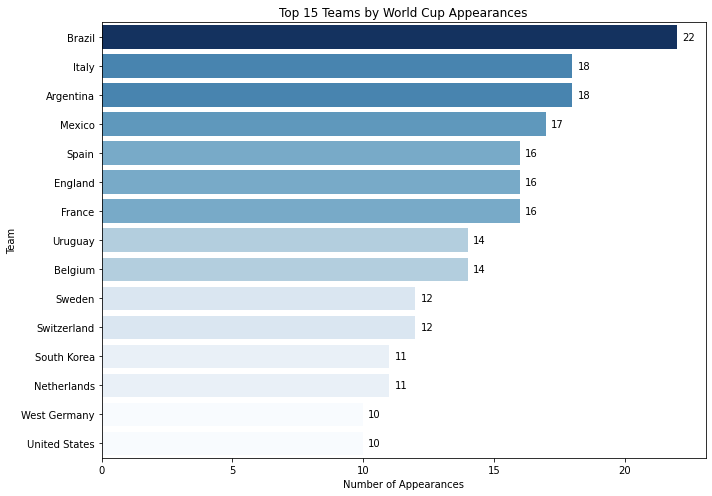

In [13]:
top_n = 15
plot_data = team_apps_data.head(top_n)

# Color mapping: darker = more appearances
colors, cmap, norm = map_colors(plot_data["Appearances"], cmap_name="Blues")

# Plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    data=plot_data,
    y="Team",
    x="Appearances",
    palette=colors
)

plt.title(f"Top {top_n} Teams by World Cup Appearances")
plt.xlabel("Number of Appearances")
plt.ylabel("Team")

# Add labels
for i, row in plot_data.iterrows():
    ax.text(row["Appearances"] + 0.2, i, row["Appearances"], va="center")

plt.tight_layout()
plt.show()
